In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [17]:
df = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Digital_Contact.csv", sep=';')
df = df.set_index('Cust_ID')

In [18]:
df.describe

<bound method NDFrame.describe of          Email_Clicks  SM_Comments  App_Clicks  SM_Likes  SM_Shares  SM_Clicks
Cust_ID                                                                       
4                  72            1           7         7        1.0         73
5                  15           20           1        35       15.0         16
6                   9            7           3        73       19.0         10
9                  67            0           2         0        1.0        101
10                 38            0           1         9        0.0         56
...               ...          ...         ...       ...        ...        ...
6489               13           14           1        83       22.0         13
6491               17           13           2        22       21.0          7
6492               34            1           2         1        2.0         53
6495               12           17           0        15       11.0         11
6496              

Check for missing values

In [19]:
df.isna().sum()

Email_Clicks     0
SM_Comments      0
App_Clicks       0
SM_Likes         0
SM_Shares       39
SM_Clicks        0
dtype: int64

In [20]:
print(df["SM_Shares"].mean())
print(df["SM_Shares"].median())

8.355970714466045
2.0


Using KNN for the missing values in SM_Shares

In [21]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

Check for missing values after KNN just to make sure...

In [22]:
df.isna().sum()

Email_Clicks    0
SM_Comments     0
App_Clicks      0
SM_Likes        0
SM_Shares       0
SM_Clicks       0
dtype: int64

In [23]:
print(df["SM_Shares"].mean())
print(df["SM_Shares"].median())

8.35635
2.0


Check for high kurtosis, meaning variables with outliers

In [24]:
df.kurt()

Email_Clicks    0.053571
SM_Comments    -1.171921
App_Clicks      1.900722
SM_Likes       -0.844043
SM_Shares      -1.124522
SM_Clicks      -0.696066
dtype: float64

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='App_Clicks', ylabel='Count'>

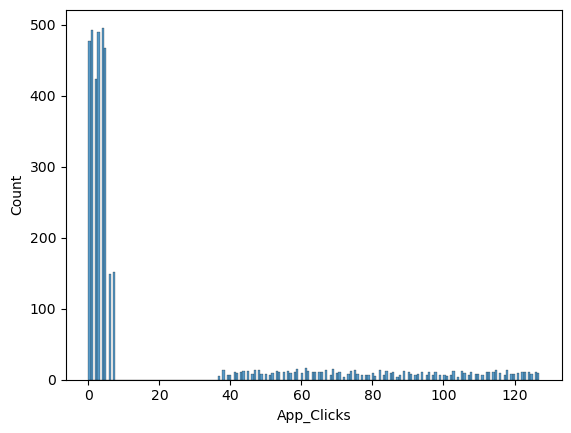

In [25]:
sns.histplot(df, x='App_Clicks')

Check for correlation between columns

In [26]:
df.corr()

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
Email_Clicks,1.000000,-0.600326,-0.144089,-0.531694,-0.574774,0.810447
SM_Comments,-0.600326,1.000000,-0.387786,0.754854,0.791200,-0.579699
App_Clicks,-0.144089,-0.387786,1.000000,-0.423025,-0.423475,-0.291367
SM_Likes,-0.531694,0.754854,-0.423025,1.000000,0.745158,-0.500684
SM_Shares,-0.574774,0.791200,-0.423475,0.745158,1.000000,-0.546753
SM_Clicks,0.810447,-0.579699,-0.291367,-0.500684,-0.546753,1.000000


In [27]:
df_sqrt = df.copy()
df_sqrt["Email_Clicks"] = np.sqrt(df_sqrt["Email_Clicks"])
df_sqrt["SM_Comments"] = np.sqrt(df_sqrt["SM_Comments"])
df_sqrt["App_Clicks"] = np.sqrt(df_sqrt["App_Clicks"])
df_sqrt["SM_Likes"] = np.sqrt(df_sqrt["SM_Likes"])
df_sqrt["SM_Shares"] = np.sqrt(df_sqrt["SM_Shares"])
df_sqrt["SM_Clicks"] = np.sqrt(df_sqrt["SM_Clicks"])

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SM_Likes', ylabel='Count'>

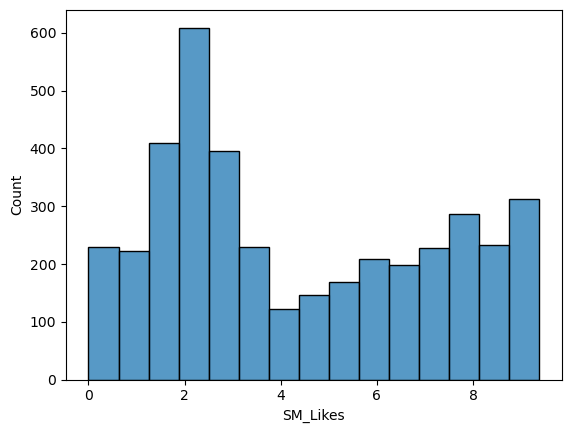

In [13]:
sns.histplot(df_sqrt, x='SM_Likes')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='App_Clicks', ylabel='Count'>

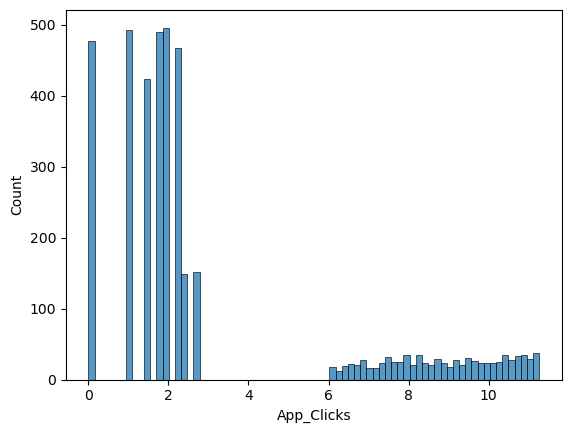

In [30]:
sns.histplot(df_sqrt, x='App_Clicks')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Email_Clicks', ylabel='Count'>

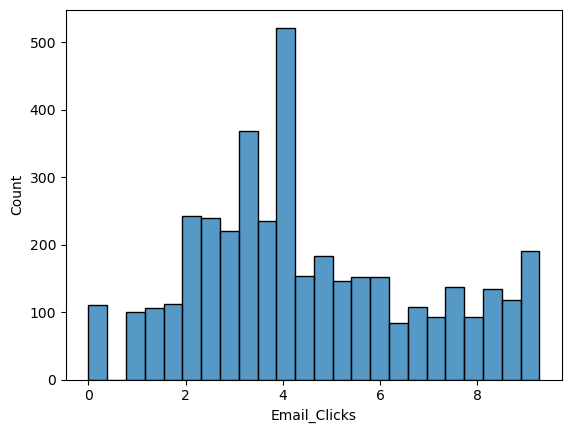

In [31]:
sns.histplot(df_sqrt, x='Email_Clicks')

Scalling data with StandardScaler, since it is more appropriate for data with outliers than MinMaxScaler

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sqrt)

Reduce data to two dimensions for visualization and better performance in KMeans

In [33]:
pca_model = PCA(n_components=2)
df_reduced = pca_model.fit_transform(df_scaled)

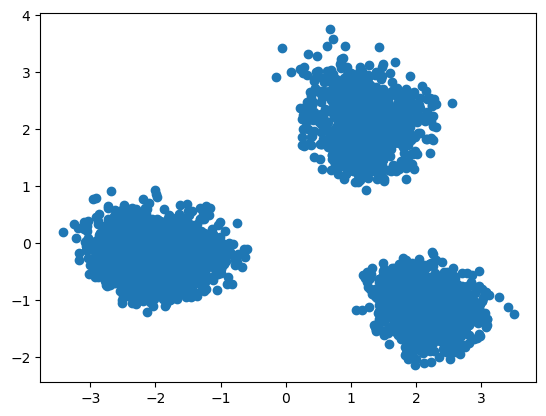

In [34]:
plt.scatter(df_reduced[:,0], df_reduced[:,1])

<Axes: xlabel='0', ylabel='1'>

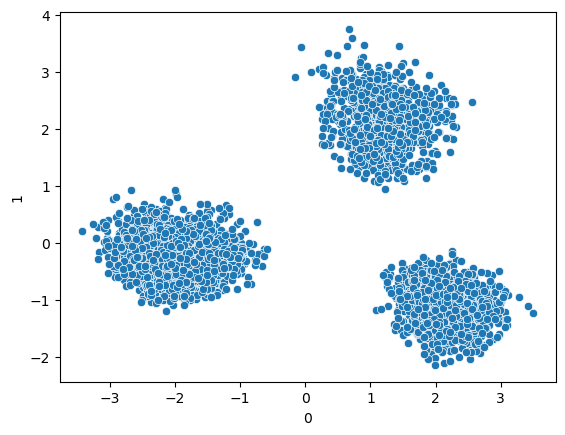

In [35]:
df_final = pd.DataFrame(df_reduced, index=df_sqrt.index)
sns.scatterplot(df_final, x=df_final[0], y=df_final[1])

We have three nicely defined clusters, but can check with Elbow Method if three is indeed the optimal number of clusters

In [36]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(df_final)
    distortions.append(km.inertia_)

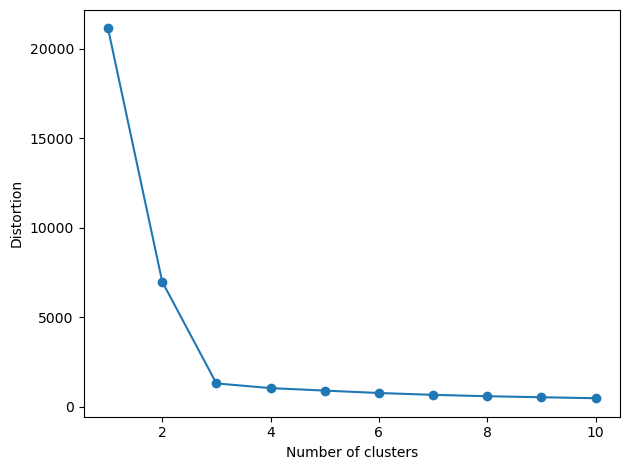

In [37]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Apply KMeans to the dataframe with 3 clusters

In [38]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

df_clustered = km.fit_predict(df_final)

In [39]:
df_final["cluster"] = km.labels_

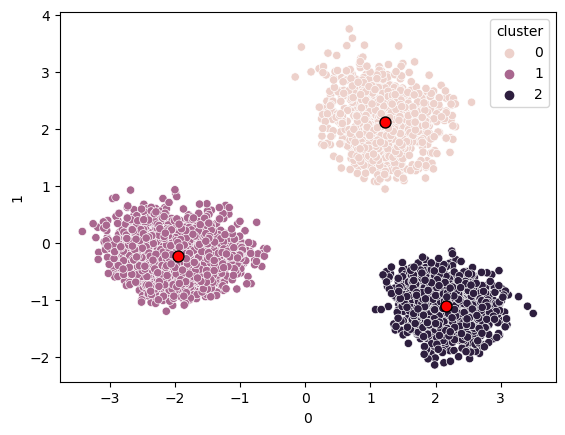

In [40]:
sns.scatterplot(df_final, x=df_final[0], y=df_final[1], hue='cluster')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='.',
            c='red', edgecolor='black',
            label='Centroids')

Merge the 3 cluster labels to the initial dataframe

In [41]:
df = df.merge(df_final["cluster"], left_index=True, right_index=True)

In [42]:
df

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,cluster
Cust_ID,,,,,,,
4,72.0,1.0,7.0,7.0,1.0,73.0,2
5,15.0,20.0,1.0,35.0,15.0,16.0,1
6,9.0,7.0,3.0,73.0,19.0,10.0,1
9,67.0,0.0,2.0,0.0,1.0,101.0,2
10,38.0,0.0,1.0,9.0,0.0,56.0,2
...,...,...,...,...,...,...,...
6489,13.0,14.0,1.0,83.0,22.0,13.0,1
6491,17.0,13.0,2.0,22.0,21.0,7.0,1
6492,34.0,1.0,2.0,1.0,2.0,53.0,2


Exploring the 3 clusters

In [43]:
cluster_distribution = df["cluster"].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

cluster_characteristics = df.groupby("cluster").agg(['mean', 'median', 'std'])
print("\nCluster Characteristics:")
print(cluster_characteristics)

Cluster Distribution:
cluster
1    1903
2    1243
0     854
Name: count, dtype: int64

Cluster Characteristics:
        Email_Clicks                   SM_Comments                   \
                mean median        std        mean median       std   
cluster                                                               
0          18.124122   18.0  10.313994    2.010539    2.0  1.418726   
1           9.682081   10.0   5.663851   15.781923   16.0  5.178136   
2          55.628319   55.0  18.741488    0.998391    1.0  0.815508   

        App_Clicks                     SM_Likes                    SM_Shares  \
              mean median        std       mean median        std       mean   
cluster                                                                        
0        80.827869   79.0  26.402904   3.339578    3.0   2.320085   0.983607   
1         2.483973    3.0   1.710557  51.545455   52.0  21.274826  16.463374   
2         3.501207    4.0   2.274402   5.539019    5.0   3.50

Cluster 0 - Um cluster muito focado em SM_Likes, Shares e SM_Comments, baixo uso de APP e baixo uso de Mail

Cluster 1 - Um cluster baseado em Clicks, tanto a nivel de mail, como a nivel de e-mail, com baixo uso de Mail e das outras interacções de SM

Cluster 2 - É o cluster que tem maior uso da APP, muito baixo uso de SM e de E-mail

In [44]:
df.columns

Index(['Email_Clicks', 'SM_Comments', 'App_Clicks', 'SM_Likes', 'SM_Shares',
       'SM_Clicks', 'cluster'],
      dtype='object')

In [45]:
df0 = df.query(' cluster == 0 ').copy()
df1 = df.query(' cluster == 1 ').copy()
df2 = df.query(' cluster == 2 ').copy()

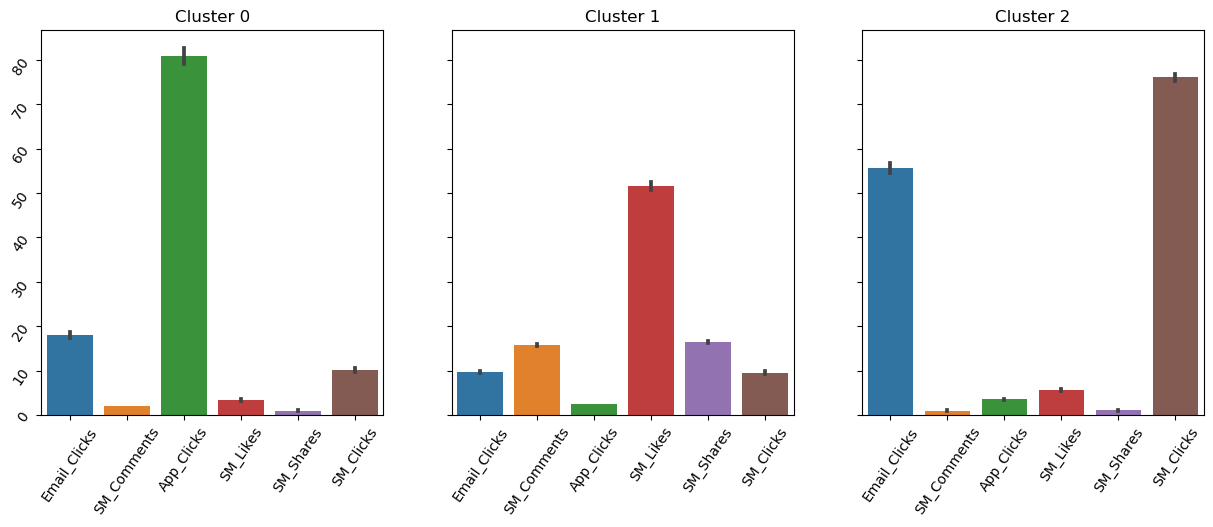

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
sns.barplot(df0.melt(id_vars='cluster'), x='variable', y='value', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.barplot(df1.melt(id_vars='cluster'), x='variable', y='value', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.barplot(df2.melt(id_vars='cluster'), x='variable', y='value', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

